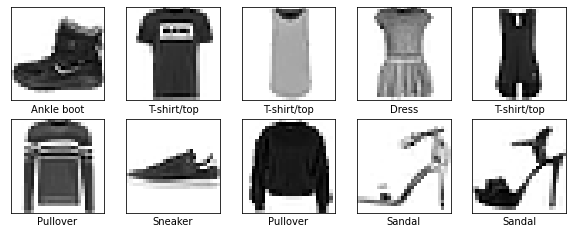

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4993 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3169 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2712 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2606 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2487 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.241

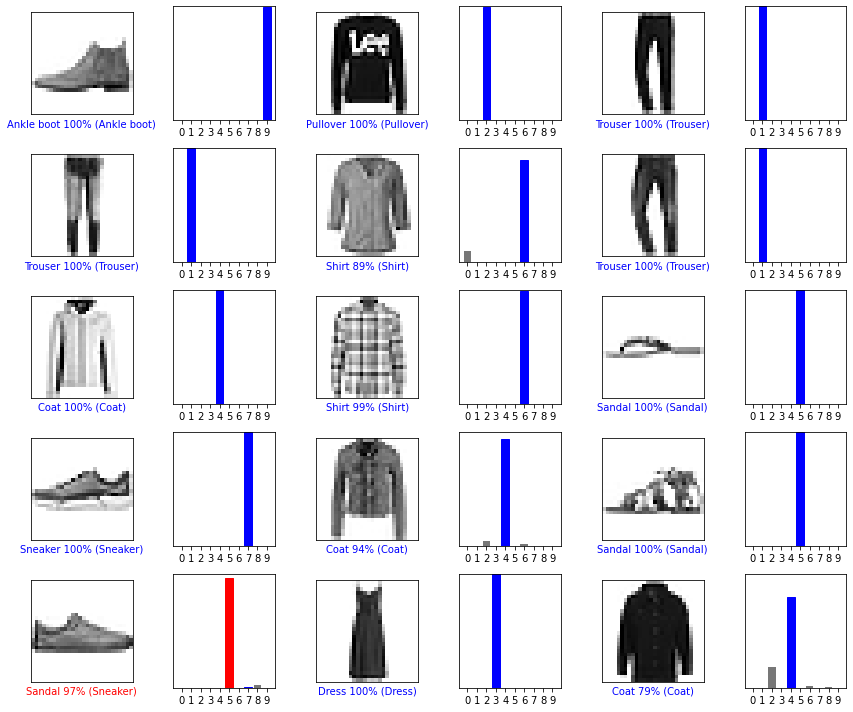

Image 2 prediction:
[[1.2474696e-05 1.7205870e-13 9.9900949e-01 3.0950917e-10 2.1863825e-04
  3.1033009e-11 7.5934629e-04 4.5873234e-16 5.6747063e-10 1.8942772e-14]]


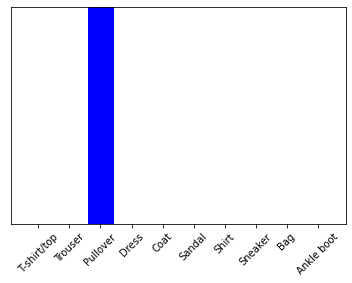

In [ ]:
# Подключение tensorflow, numpy, matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Загрузка дата сета из Tensor Flow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Категории одежды
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Форматирование изображений
train_images = train_images / 255.0
test_images = test_images / 255.0

# Листинг первых 10 изображений
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Настройка слоев модели
# Flatten - преобразует формат изображений из двумерного массива в одномерный
# Dense(128) - имеет 128 узлов или нейронов
# Dense(10) - возвращает массив логитов длиной 10
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Компиляция модели
# optimizer - оптимизатор
# loss - измеряет на сколько точна модель во время обучения
# metrics - используются для мониторинга этапов обучения и тестирования
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Начало обучения - 10 эпох (этапов)
model.fit(train_images, train_labels, epochs=10)

# Оценка точности на тестовом наборе данных
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Прогнозирование
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Параметры для визуализации
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
# Параметры дл визуализации
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Построение изображений с их предсказаниями
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Выбор одного изображения
img = test_images[1]
img = (np.expand_dims(img,0))

# Прогноз для одного изображения
predictions_single = probability_model.predict(img)

print("Image 2 prediction:")
print(predictions_single)
np.argmax(predictions_single[0])

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
